**EDA---Exploratory Data Analysis**
in data frame if any field is not entered with values then such values are called as missing values
-- We will fill missing values with NAN before filling it with numbers
NAN-- Not A  Number

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("data1.csv")
df.head()

,Name,Python,Machine Learning
0,jay,90.0,NaN
1,raj,NaN,89.0
2,kumar,78.0,78.0
3,suraj,NaN,NaN
4,pawan,NaN,87.0


In [ ]:
df.dropna() #drop all rows with nan

,Name,Python,Machine Learning
2,kumar,78.0,78.0
5,viraj,65.0,56.0
6,vijay,45.0,67.0
7,sumit,80.0,45.0
8,akash,70.0,67.0


In [ ]:
# There are 3 rules to handle missing values
# 1. if missing values are <3 then drop entire row
# 2 if missing value are b/w 4 to -50% ,fill missing values using fillna() method
# m3.if missing value are >50 then drop entire column

In [ ]:
df.isna().sum() # it return total number of nan values

Name                0
Python              4
Machine Learning    3
dtype: int64

In [ ]:
#find mean of python col
pmean=df['Python'].mean()
pmean

71.33333333333333

In [ ]:
#find mean of ML col
mlmean=df['Machine Learning'].mean()
mlmean

69.85714285714286

In [ ]:
#fill nan values by mean
df['Python'].fillna(pmean,inplace=True)

In [ ]:
df['Machine Learning'].fillna(mlmean,inplace=True)

In [ ]:
df.isna().sum()

Name                0
Python              0
Machine Learning    0
dtype: int64

In [ ]:
df.head()

,Name,Python,Machine Learning
0,jay,90.000000,69.857143
1,raj,71.333333,89.000000
2,kumar,78.000000,78.000000
3,suraj,71.333333,69.857143
4,pawan,71.333333,87.000000


In [ ]:
df=pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
#Alternate method to fill missing value
#Sklearn---->impute ---->SimpleImputer
from sklearn.impute import SimpleImputer

In [ ]:
#it contains 2 argument missing value,startegy

si=SimpleImputer(missing_values=np.nan,strategy='mean')

We can fill missing values with different values 1.Mean---if there ids no skewness ,then fill missing values with mean

2.Median--if dataset is right or left skewed then fill missing values by median

3.Mode--if we have categorical data then fill missing values with mode

In [ ]:
df.iloc[:,[1,11]]=si.fit_transform(df.iloc[:,[1,11]])
df

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '?'

---Each row in ML called as observation/sample/instance/records

---each column is called as feature/attribute/variable/ip col ,independant

---the column which we need to predict id known as target column

---by default 70-80% data goes training and 20 to 30 % data goes for testing

Rules before model building

1.Feature and target should be separated from dataset

2.Feature and response should be numeric in nature

3.feature and response should be proper shape

In [ ]:
#separating feature and target

X=df.iloc[:,:-1] #all col except price
y=df.iloc[:,-1]  # all rows of last col

In [ ]:
y.head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

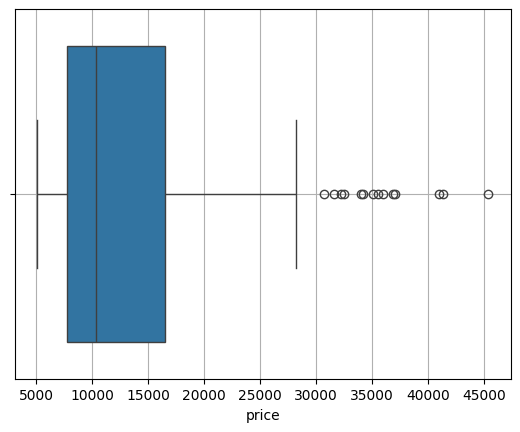

In [ ]:
#Find out Outliers
sns.boxplot(data=X,x=y)
plt.grid()
plt.show()

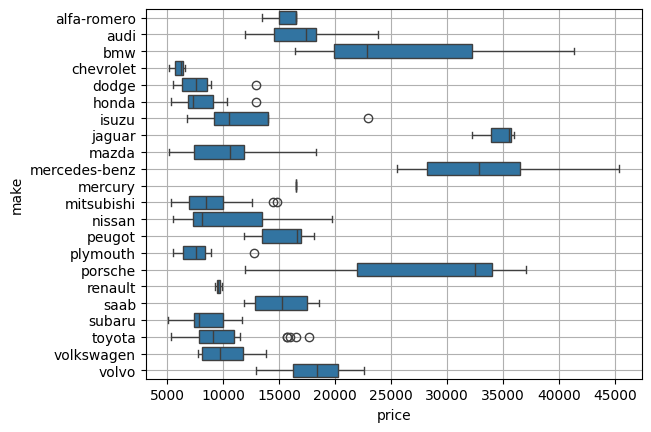

In [ ]:
sns.boxplot(data=X,x=y,y='make')
plt.grid()
plt.show()

In [ ]:
#removing outliers from datapoints
X[(X.make=='dodge')& (y>10000)]
X.drop(29,axis=0,inplace=True)
y.drop(29,axis=0,inplace=True)

In [ ]:
X[(X.make=='honda')& (y>12000)]
X.drop(41,axis=0,inplace=True)
y.drop(41,axis=0,inplace=True)

In [ ]:
X[(X.make=='isuzu')& (y>20000)]


,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
45,0,?,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70,38,43


In [ ]:
X.drop(45,axis=0,inplace=True)
y.drop(45,axis=0,inplace=True)

In [ ]:
X[(X.make=='plymouth')& (y>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
124,3,?,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145,19,24


In [ ]:
X.drop(124,axis=0,inplace=True)
y.drop(124,axis=0,inplace=True)

In [ ]:
X[(X.make=='mitsubishi')& (y>13000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
83,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24
84,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24


In [ ]:
X.drop([83,84],axis=0,inplace=True)
y.drop([83,84],axis=0,inplace=True)

In [ ]:
X[(X.make=='toyota')& (y>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg


In [ ]:
X.drop([172,178,179,180,181],axis=0,inplace=True)
y.drop([172,178,179,180,181],axis=0,inplace=True)

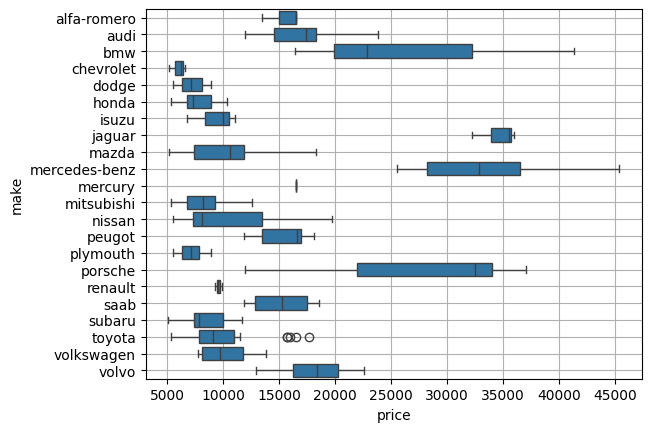

In [ ]:
sns.boxplot(data=X,x=y,y='make')
plt.grid()
plt.show()

In [ ]:
X.shape

(194, 14)

#Skewness
it is measure of asymetry it tell us how datapoints are distributed 3 types 1.Positive 2.negative 3.Zero

we reduce skewness by using 2 methods
 1..Longvalue
 2...squareroot value


In [ ]:
from scipy.stats import skew

In [ ]:
colname=X.select_dtypes(['int64','float64']).columns
colname

Index(['symboling', 'width', 'height', 'engine-size', 'city-mpg',
       'highway-mpg'],
      dtype='object')

In [ ]:
#apply skew function on one column
skew(X["normalized-losses"])

symboling
0.21386866184357742


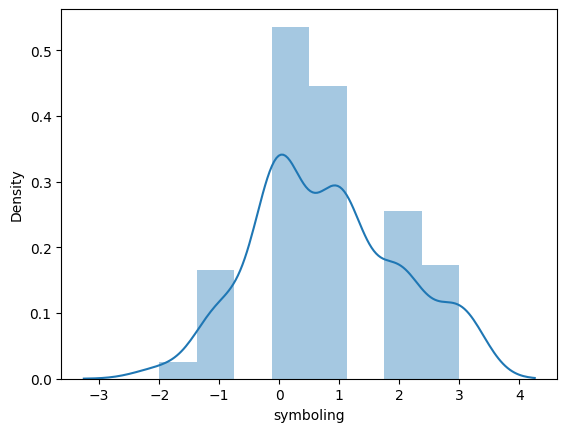

width
0.9140400320504322


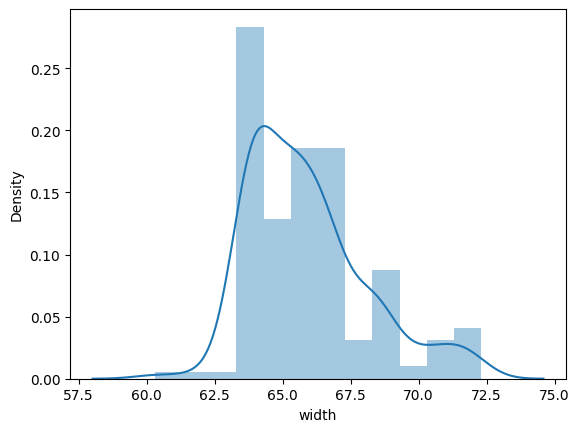

height
0.013839962443639326


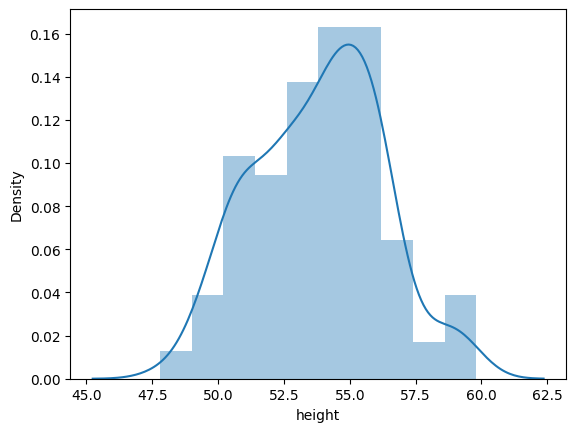

engine-size
2.0541257626466156


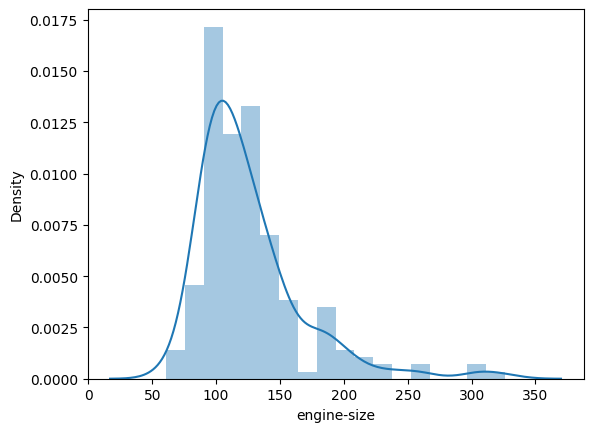

city-mpg
0.5999073033714895


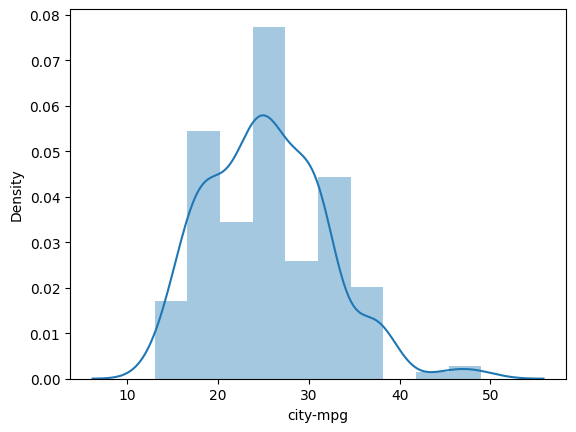

highway-mpg
0.4760310091695327


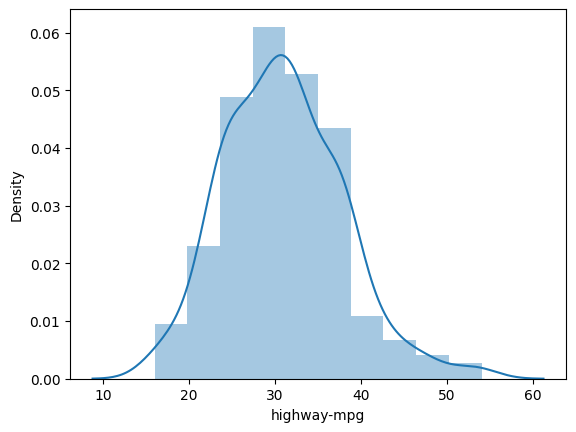

In [ ]:
# apply for loop for calculating skew gor all col
for col in X[colname]:
  print(col)
  print(skew(X[col]))
  plt.figure()
  sns.distplot(X[col])
  plt.show()

--Before removing skewness we need to check correlation of features with target

follow 2 rules-- 1)if the column is skewed but showing good correlation with target then dont remove skewness 2) if the column which is skewed has some negative values dont not skewness even though showing poor corelationship with target

In [ ]:
#removing skewness by using logvalue method

X['highway-mpg']=np.log(X['highway-mpg'])
skew(X['highway-mpg'])

-0.21180400156774282

In [ ]:
#process of converting categorical data into numbers are called as encoding
'''
1.One hot encoding
2.Label encoding
3.target encoding
4.Frequency encoding
5.Binary encoding
6.Feature encoding'''

'\n1.One hot encoding\n2.Label encoding\n3.target encoding\n4.Frequency encoding\n5.Binary encoding\n6.Feature encoding'

In [ ]:
#one hot encoding----
'''
in this type each value will be conc=vrted into eigther 1 or 0
 1 represent inclusion
 0 represent exclusion'''


In [ ]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [ ]:
X['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [ ]:
pd.get_dummies(X["fuel-type"])

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


In [ ]:
#import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder()

In [ ]:
ohe.fit_transform(X[['fuel-type']]).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
pd.get_dummies(X["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
ohe.fit_transform(X[['make']]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#By using LabelEncoder
from sklearn.preprocessing import LabelEncoder


In [ ]:
le=LabelEncoder()

In [ ]:
le.fit_transform(X['fuel-type'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
#By using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder()

In [ ]:
#paasing all categorical col
cat_col=X.select_dtypes(object).columns
cat_col

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

In [ ]:
X[cat_col]=oe.fit_transform(X[cat_col])
X

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,3,49.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,5.0,21,3.295837
1,3,49.0,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,5.0,21,3.295837
2,1,49.0,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,20.0,19,3.258097
3,2,27.0,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,2.0,24,3.401197
4,2,27.0,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,8.0,18,3.091042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,47.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,7.0,23,3.332205
201,-1,47.0,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,22.0,19,3.218876
202,-1,47.0,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,13.0,18,3.135494
203,-1,47.0,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,3.0,26,3.295837


In [ ]:
#data scaling/Feature scaling
'''
it is process of bringing all the numeric quantity under one standered scale

2 ways
1.Min-max scaler
2. standrd scaler'''

'\nit is process of bringing all the numeric quantity under one standered scale\n\n2 ways\n1.Min-max scaler\n2. standrd scaler'

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

In [ ]:
mn=MinMaxScaler()

In [ ]:
X.iloc[:,:]=mn.fit_transform(X.iloc[:,:])
X

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.0,1.000000,0.000000,1.0,0.00,1.0,0.0,0.316667,0.083333,0.000000,0.260377,0.087719,0.222222,0.430163
1,1.0,1.000000,0.000000,1.0,0.00,1.0,0.0,0.316667,0.083333,0.000000,0.260377,0.087719,0.222222,0.430163
2,0.6,1.000000,0.000000,1.0,0.50,1.0,0.0,0.433333,0.383333,0.833333,0.343396,0.350877,0.166667,0.399137
3,0.8,0.551020,0.047619,1.0,0.75,0.5,0.0,0.491667,0.541667,0.500000,0.181132,0.035088,0.305556,0.516780
4,0.8,0.551020,0.047619,1.0,0.75,0.0,0.0,0.508333,0.541667,0.500000,0.283019,0.140351,0.138889,0.261801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.959184,1.000000,1.0,0.75,1.0,0.0,0.716667,0.641667,0.500000,0.301887,0.122807,0.277778,0.460061
201,0.2,0.959184,1.000000,1.0,0.75,1.0,0.0,0.708333,0.641667,0.500000,0.301887,0.385965,0.166667,0.366893
202,0.2,0.959184,1.000000,1.0,0.75,1.0,0.0,0.716667,0.641667,0.833333,0.422642,0.228070,0.138889,0.298345
203,0.2,0.959184,1.000000,0.0,0.75,1.0,0.0,0.716667,0.641667,0.500000,0.316981,0.052632,0.361111,0.430163


In [ ]:
from sklearn.preprocessing import  StandardScaler

In [ ]:
sc=StandardScaler()
X.iloc[:,:]=sc.fit_transform(X.iloc[:,:])
X

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.846173,1.249587,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,-1.462493,-0.675762,-0.504728
1,1.846173,1.249587,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,-1.462493,-0.675762,-0.504728
2,0.176441,1.249587,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,-0.621083,-0.982065,-0.673327
3,1.011307,-0.091770,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-1.630775,-0.216307,-0.034046
4,1.011307,-0.091770,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,-1.294211,-1.135217,-1.419615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.493292,1.127645,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.366605,-1.350305,-0.369459,-0.342261
201,-1.493292,1.127645,1.413123,0.339032,0.432341,1.234608,-0.125327,1.331576,0.687151,-0.078162,0.366605,-0.508894,-0.982065,-0.848539
202,-1.493292,1.127645,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,-1.013741,-1.135217,-1.221033
203,-1.493292,1.127645,1.413123,-2.949576,0.432341,1.234608,-0.125327,1.377370,0.687151,-0.078162,0.462006,-1.574681,0.089996,-0.504728


In [ ]:
#Feature Engineering
# It is process of extracting and organizing the imp feaures from raw data such that fit into ML

In [ ]:
X.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
0,1.846173,1.249587,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,-1.462493,-0.675762,-0.504728
1,1.846173,1.249587,-1.934007,0.339032,-3.111634,1.234608,-0.125327,-0.820757,-2.056808,-3.110852,0.104252,-1.462493,-0.675762,-0.504728
2,0.176441,1.249587,-1.934007,0.339032,-0.748984,1.234608,-0.125327,-0.179636,-0.582442,1.943631,0.628957,-0.621083,-0.982065,-0.673327
3,1.011307,-0.091770,-1.774620,0.339032,0.432341,-0.566249,-0.125327,0.140924,0.195695,-0.078162,-0.396602,-1.630775,-0.216307,-0.034046
4,1.011307,-0.091770,-1.774620,0.339032,0.432341,-2.367105,-0.125327,0.232512,0.195695,-0.078162,0.247354,-1.294211,-1.135217,-1.419615


In [ ]:
X.shape

(194, 14)

In [ ]:
y.shape

(194,)

In [ ]:
# spliting training ad testing data
from sklearn.model_selection import  train_test_split

In [ ]:
#The entire data frame will be divided into 4 parts xtrain,xtest,ytrain,ytest

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

In [ ]:
xtrain

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
183,1.011307,-0.945361,1.253736,0.339032,0.432341,-0.566249,-0.125327,-0.179636,0.769060,-0.078162,-0.396602,1.005645,0.243148,0.525100
28,-1.493292,-1.311186,-1.296458,0.339032,1.613665,-0.566249,-0.125327,-0.591785,2.448199,-0.078162,-0.086549,1.117833,-0.216307,-0.034046
162,-0.658425,0.944733,1.094349,0.339032,0.432341,-0.566249,-0.125327,-0.683374,-0.418624,-0.078162,-0.658954,0.612986,0.396300,0.525100
100,-0.658425,-1.494099,-0.021361,0.339032,0.432341,-0.566249,-0.125327,-0.317019,0.359514,-0.078162,-0.134250,1.398303,0.243148,0.525100
58,1.846173,-0.396624,-0.658910,0.339032,-0.748984,1.234608,-0.125327,-0.088048,-1.729171,2.954528,-1.088258,-0.957647,-1.441520,-1.221033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,-0.658425,1.249587,-0.818297,0.339032,0.432341,1.234608,-0.125327,2.155874,-2.466354,1.943631,4.778895,-0.060142,-1.900975,-2.571426
10,1.011307,0.152113,-1.615232,0.339032,0.432341,1.234608,-0.125327,-0.500197,0.195695,-0.078162,-0.420452,-1.686869,-0.369459,-0.185496
160,-0.658425,0.944733,1.094349,0.339032,0.432341,-0.566249,-0.125327,-0.683374,-0.336714,-0.078162,-0.658954,0.612986,1.927816,1.971568
202,-1.493292,1.127645,1.413123,0.339032,0.432341,1.234608,-0.125327,1.377370,0.687151,1.943631,1.129812,-1.013741,-1.135217,-1.221033


In [ ]:
xtest

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg
33,0.176441,-1.737982,-1.137071,0.339032,-0.748984,-0.566249,-0.125327,-0.866551,-0.500533,-0.078162,-0.802056,0.781269,0.702603,0.525100
196,-2.328158,-1.616040,1.413123,0.339032,0.432341,1.234608,-0.125327,0.598867,0.973833,-0.078162,0.366605,-1.350305,-0.216307,-0.342261
159,-0.658425,0.944733,1.094349,-2.949576,-0.748984,-0.566249,-0.125327,-0.683374,-0.418624,-0.078162,-0.372752,0.220328,1.927816,1.971568
184,1.011307,1.066674,1.253736,-2.949576,0.432341,-0.566249,-0.125327,-0.179636,0.769060,-0.078162,-0.682805,0.108140,1.774664,1.875493
99,-0.658425,-1.494099,-0.021361,0.339032,-0.748984,-0.566249,-0.125327,-0.317019,0.359514,-0.078162,-0.134250,1.398303,0.243148,0.525100
94,0.176441,-0.823420,-0.021361,0.339032,0.432341,-0.566249,-0.125327,-0.958140,0.277605,-0.078162,-0.682805,0.556892,0.855754,0.902847
156,-0.658425,0.944733,1.094349,0.339032,0.432341,-0.566249,-0.125327,-0.683374,-0.336714,-0.078162,-0.658954,0.612986,0.702603,0.902847
171,1.011307,-0.701478,1.094349,0.339032,-0.748984,1.234608,-0.125327,-0.133842,-0.746260,-0.078162,0.485856,-1.238117,-0.216307,-0.034046
82,1.846173,1.249587,-0.180748,0.339032,-0.748984,-0.566249,-0.125327,0.186718,-1.483443,-0.078162,0.724358,-0.733271,-0.982065,-1.030905
44,0.176441,1.249587,-0.977684,0.339032,0.432341,-0.566249,-0.125327,-1.049729,-0.746260,-0.078162,-0.849756,0.612986,1.927816,1.574209


In [ ]:
ytrain


183     7975
28      8921
162     9258
100     9549
58     15645
       ...  
49     36000
10     16430
160     7738
202    21485
18      5151
Name: price, Length: 145, dtype: int64

In [ ]:
ytest

33      6529
196    15985
159     7788
184     7995
99      8949
94      7299
156     6938
171    11549
82     12629
44     10000
164     8238
68     28248
174    10698
198    18420
91      6649
35      7295
73     40960
52      6795
118     5572
69     28176
144     9233
37      7895
193    12290
26      7609
158     7898
149    11694
16     41315
129    12000
203    22470
47     32250
6      17710
161     8358
32      5399
123     8921
13     21105
177    11248
14     24565
48     35550
89      5499
77      6189
188     9995
151     6338
92      6849
79      7689
46     11048
39      8845
195    13415
143     9960
101    13499
Name: price, dtype: int64